In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [110]:
df=pd.read_csv('bodyfat.csv')
df.head()


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [111]:
df.drop('Density',axis=1,inplace=True)
df.head()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [112]:
df['Weight'] = (df['Weight'] * 0.453592).round(2)
df.head()


,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23,69.97,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,78.58,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,69.85,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,83.80,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,83.57,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [113]:
x=df.drop(['BodyFat'],axis=1)
y=df['BodyFat']

model=LinearRegression()

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [117]:
y_pred=model.predict(x_test)
r2=r2_score(y_test,y_pred)
r2

0.6134380589022963

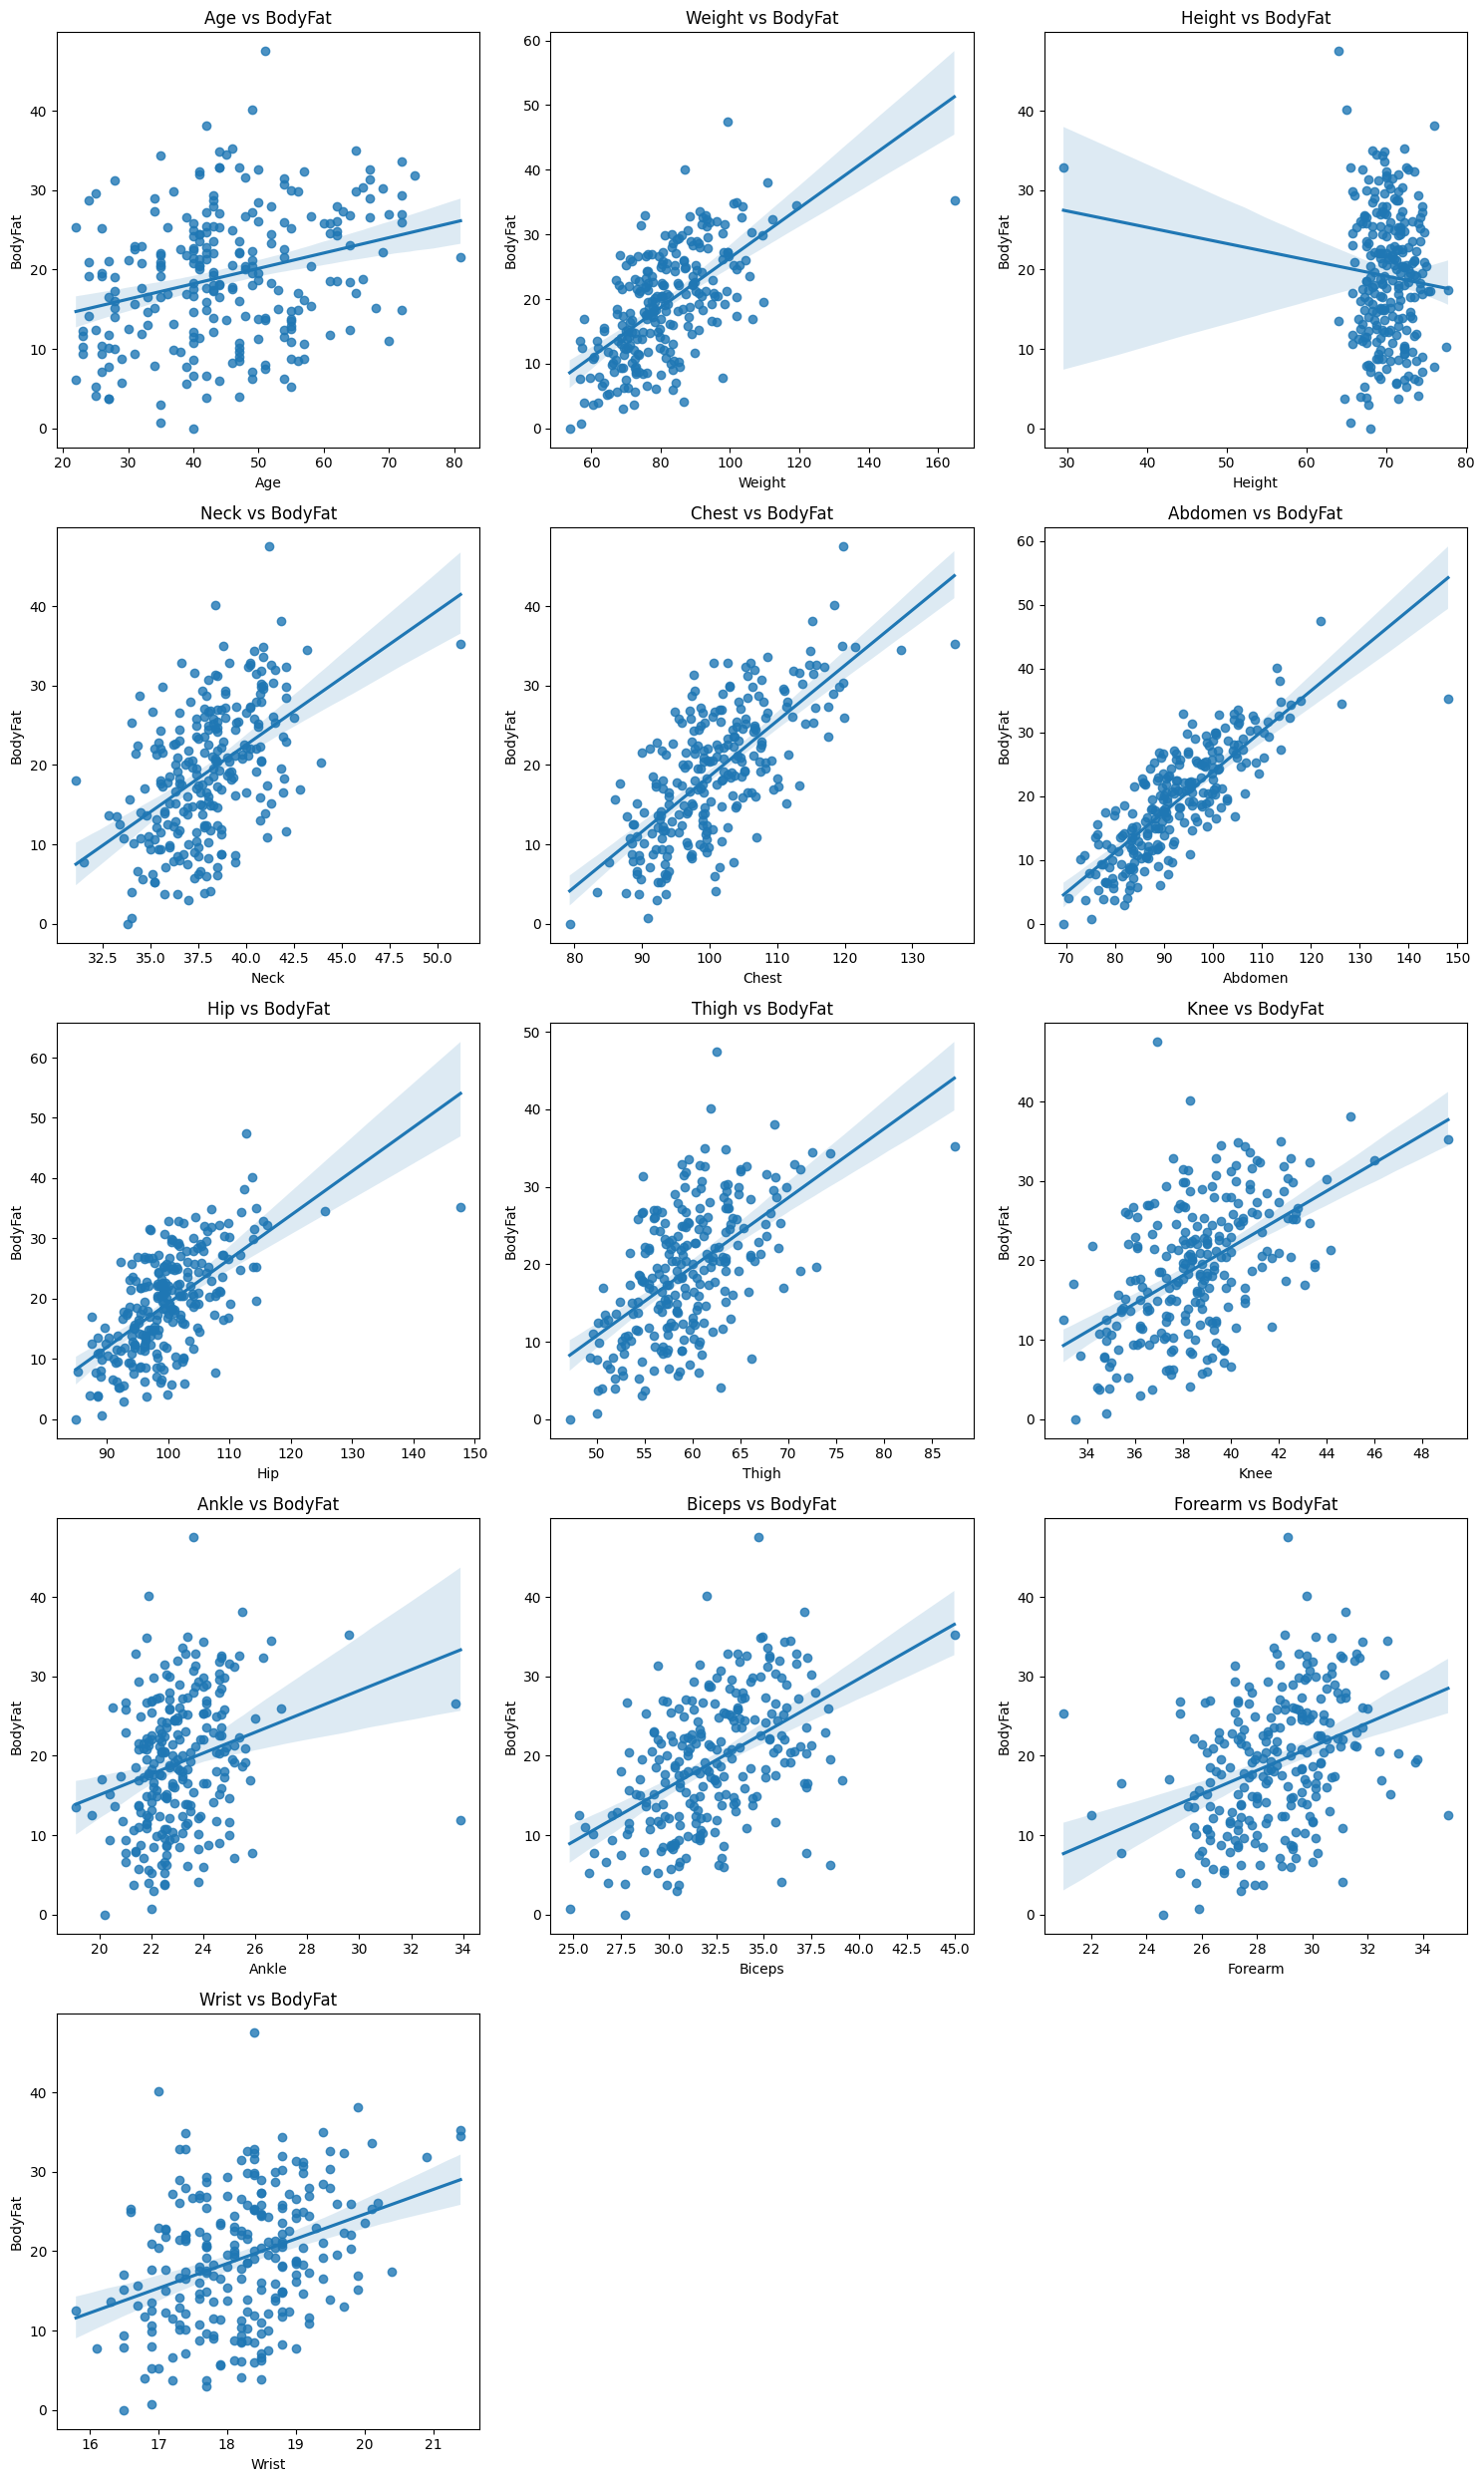

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get all columns except BodyFat
cols = [col for col in df.columns if col != 'BodyFat']

# Determine subplot grid size
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(cols) / n_cols)

# Create the figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through columns and create regplots
for i, col in enumerate(cols):
    sns.regplot(x=col, y='BodyFat', data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs BodyFat')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [119]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()


In [120]:

model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

print("R² Score:", r2_score(y_test, y_pred))
df1=x_test
df1.head()

R² Score: 0.6714070883063965


,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
165,35,98.43,73.75,40.5,107.5,95.1,104.5,64.8,41.3,25.6,36.4,33.7,19.4
6,26,82.10,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
111,43,83.12,70.00,37.1,108.0,105.0,103.0,63.7,40.0,23.6,33.5,27.8,17.4
172,35,80.40,71.00,38.4,100.5,90.3,98.7,57.8,37.3,22.4,31.0,28.7,17.7
115,40,71.67,69.25,36.3,97.0,86.6,92.6,55.9,36.3,22.1,29.8,26.3,17.3


In [126]:
import numpy as np

def calculate_density_male(height_cm, neck_cm, abdomen_cm):
    return 495 / (86.010 * np.log10(abdomen_cm - neck_cm) 
                  - 70.041 * np.log10(height_cm) 
                  + 36.76 + 450)
density=calculate_density_male(67.75,36.2,85.2)
print(density)
model.predict([[27,133.25,64.75,36.4,93.5,73.9,88.5,50.1,34.5,21.3,30.5,27.9,17.2]])

0.9823474220398679


c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5.572])